# Systematic Risk, Beta Factor and the CAPM Model

## Recap and Motivation

Portfolio Risk seems to be much lower than the weighted average of its constituents -> __Diversification Effect!!!__

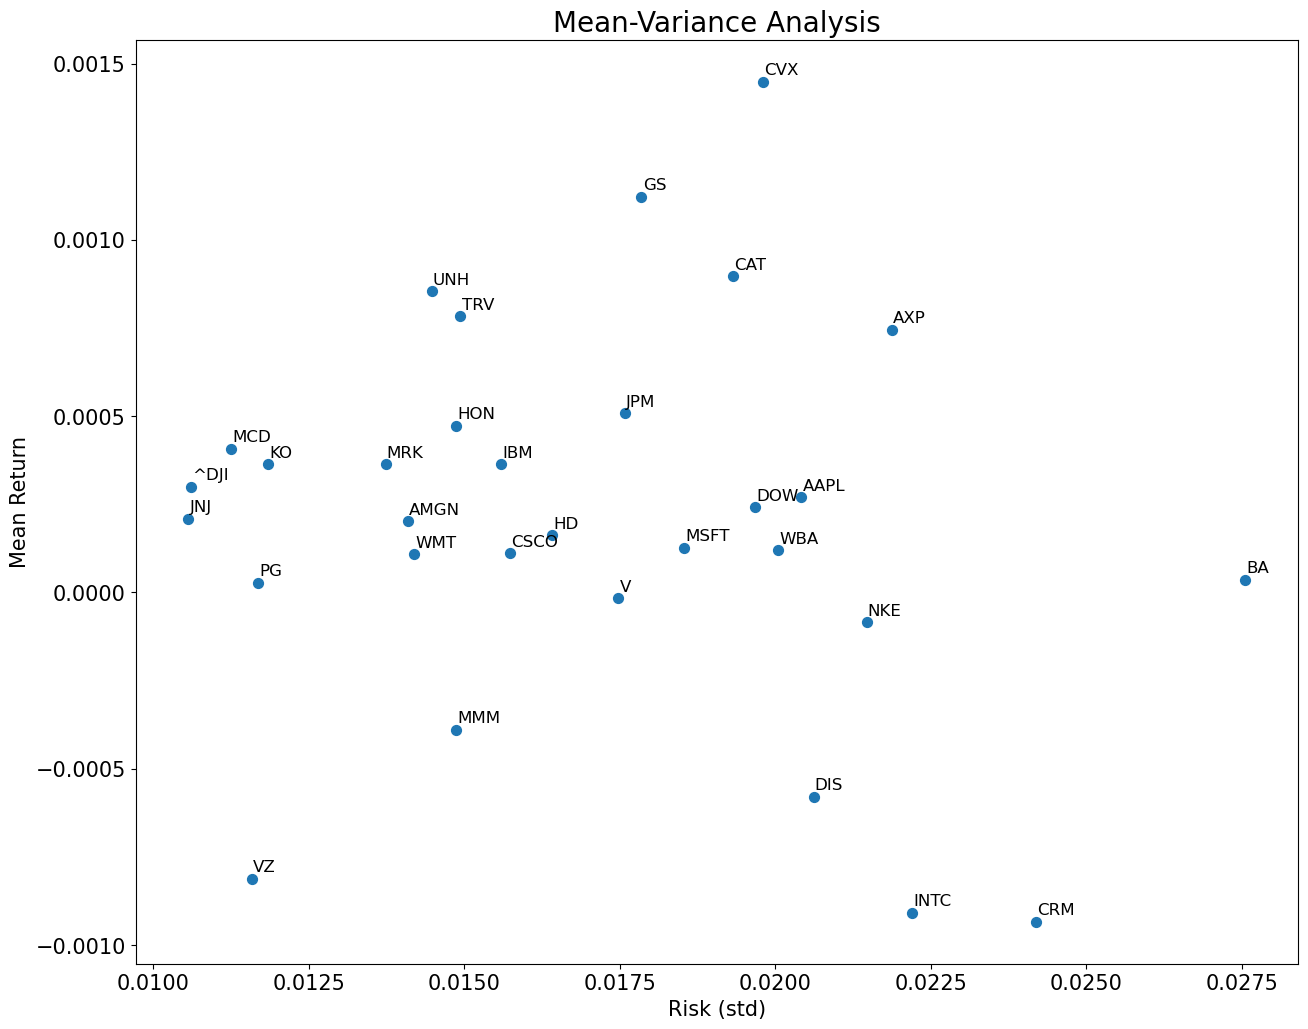

- In a diversified Portfolio, parts of a stock´s total risk __can be eliminated__.  (__unsystematic__/diversifiable risk) 
- In a diversified Portfolio, parts of a stock´s total risk __can´t be eliminated__ (__systematic risk__)
- How to __measure/quantify__ systematic risk (market risk)?

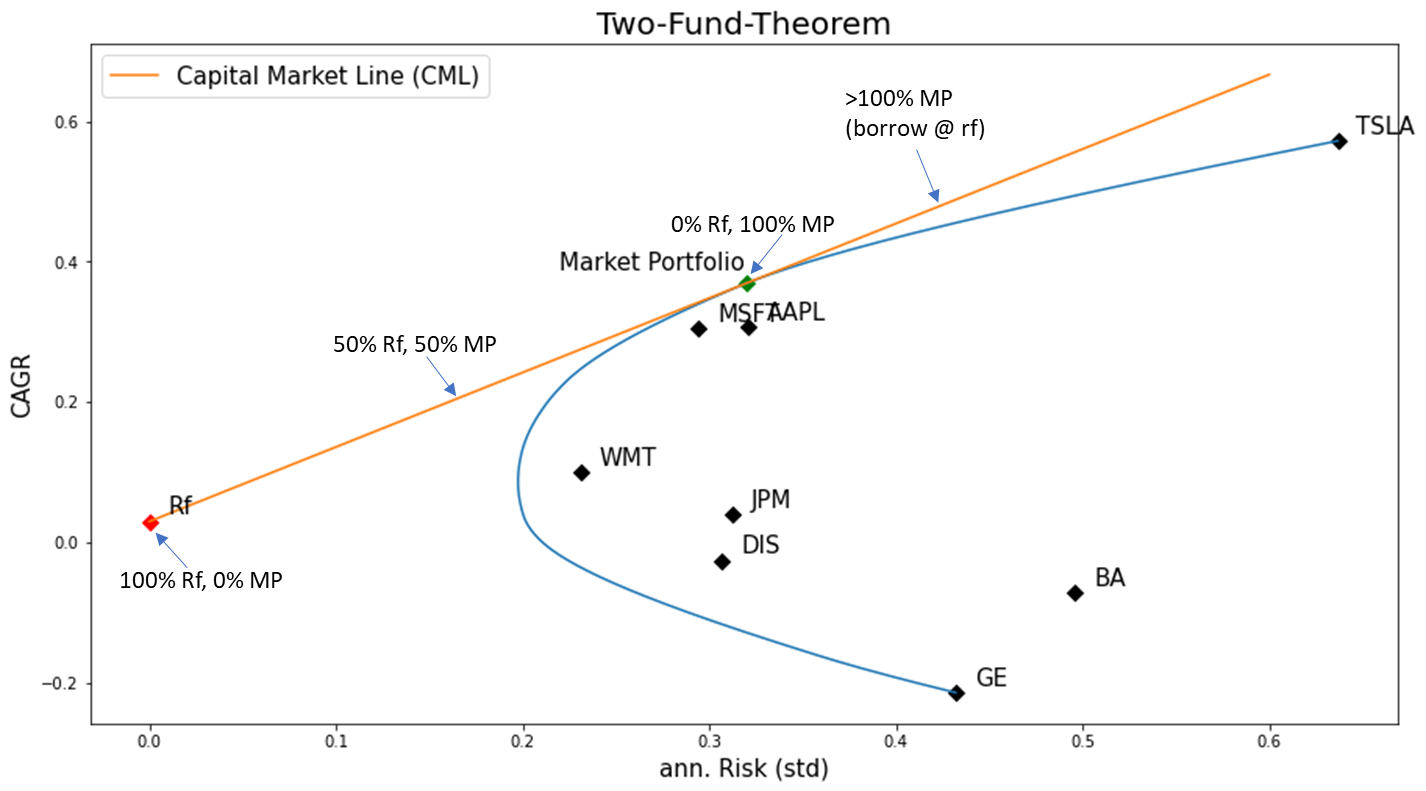

- All investors should hold a __diversified Portfolio__ (Market Portfolio)
- Investors shouldn´t care about a stock´s diversifiable risk.
- Stock investors should __only get compensated for taking systematic/market risk__. 
- For single stocks, the __relationship between market risk and return__ should be more meaningful (CAPM model)
- __Motivation: CAPM can be helpful to predict stock returns.__ (ex ante)
- __Motivation: CAPM can be helpful to measure and assess single Stock Performance (Benchmarking)__ (ex post)

## Getting started

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
prices = pd.read_csv("Stocks.csv", index_col = "Date", parse_dates = ["Date"])
prices

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,35.875000,198.589996,107.459999,211.153839,92.750000,68.169998,23.507999,75.360001
2017-07-05,36.022499,201.809998,105.629997,210.384613,93.680000,69.080002,21.806000,75.320000
2017-07-06,35.682499,201.479996,103.349998,202.384613,93.379997,68.570000,20.588667,75.470001
2017-07-07,36.044998,202.369995,103.320000,201.153839,93.849998,69.459999,20.881332,75.330002
2017-07-10,36.264999,203.960007,103.589996,200.307693,93.190002,69.980003,21.070000,73.230003
...,...,...,...,...,...,...,...,...
2022-06-24,141.660004,141.529999,97.779999,67.080002,117.320000,267.700012,245.706665,123.720001
2022-06-27,141.660004,138.720001,96.610001,66.709999,116.379997,264.890015,244.919998,124.120003
2022-06-28,137.440002,138.699997,95.919998,65.879997,115.820000,256.480011,232.663330,122.370003


In [3]:
returns = prices.pct_change().dropna() 
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-05,0.004111,0.016214,-0.017030,-0.003643,0.010027,0.013349,-0.072401,-0.000531
2017-07-06,-0.009439,-0.001635,-0.021585,-0.038026,-0.003202,-0.007383,-0.055826,0.001992
2017-07-07,0.010159,0.004417,-0.000290,-0.006081,0.005033,0.012979,0.014215,-0.001855
2017-07-10,0.006104,0.007857,0.002613,-0.004206,-0.007032,0.007486,0.009035,-0.027877
2017-07-11,0.003240,0.011326,0.002413,0.013057,-0.003863,0.000143,0.035343,0.003277
...,...,...,...,...,...,...,...,...
2022-06-24,0.024517,0.056431,0.036903,0.046980,0.029846,0.034150,0.045249,0.000809
2022-06-27,0.000000,-0.019854,-0.011966,-0.005516,-0.008012,-0.010497,-0.003202,0.003233
2022-06-28,-0.029790,-0.000144,-0.007142,-0.012442,-0.004812,-0.031749,-0.050044,-0.014099


In [4]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2017-07-05 to 2022-06-30
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1257 non-null   float64
 1   BA      1257 non-null   float64
 2   DIS     1257 non-null   float64
 3   GE      1257 non-null   float64
 4   JPM     1257 non-null   float64
 5   MSFT    1257 non-null   float64
 6   TSLA    1257 non-null   float64
 7   WMT     1257 non-null   float64
dtypes: float64(8)
memory usage: 88.4 KB


## Portfolio Optimization (Optimizing the past)

Goal: Get the Market Portfolio (ex post)

In [ ]:
import scipy.optimize as sco
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress = True)

In [ ]:
rf = 0.03

In [ ]:
returns 

In [ ]:
# exception: use mean of simple returns (linearity)
def port_ret(weights):
    simple_ret = returns.dot(weights.T)
    return simple_ret.mean() * 252

In [ ]:
#calculate annualized portfolio volatility (based on weights)
def port_vol(weights):
    simple_ret = returns.dot(weights.T)
    return simple_ret.std() * np.sqrt(252)

In [ ]:
#define function to be minimized (sco only supports minimize, not maximize)
def sharpe(weights): 
     return -(port_ret(weights) - rf) / port_vol(weights) 

In [ ]:
#number of assets
noa = len(returns.columns)
noa

In [ ]:
#equal weights (starting point of optimization)
eweigths = np.full(noa, 1/noa)
eweigths

In [ ]:
#constraint: weights must sum up to 1 -> sum of weights - 1 = 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [ ]:
#bounds: all weights shall be between 0 and 1 -> can be changed
bnds =  tuple((0, 1) for x in range(noa))
bnds

In [ ]:
#run optimization based on function to be minimized, starting with equal weights and based on respective bounds and constraints
opts = sco.minimize(sharpe, eweigths, method = "SLSQP", bounds = bnds, constraints= cons)

In [ ]:
#output of optimization
opts

In [ ]:
#getting the optimal weights
optimal_weights = opts["x"]
optimal_weights

In [ ]:
optimal_weights = pd.Series(data = optimal_weights, index = returns.columns).sort_values(ascending = False)
optimal_weights

In [ ]:
returns["MP"] =  returns.dot(optimal_weights.T)
returns

In [ ]:
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    summary["ann. Return"] = returns_df.mean() * 252 # mean of simple returns
    return summary

In [ ]:
summary = ann_risk_return(returns)
summary

In [ ]:
summary["Sharpe"] = (summary["ann. Return"] - rf) / summary["ann. Risk"]
summary

## Systematic and Unsystematic Risk

In [ ]:
summary["TotalRisk_var"] = summary["ann. Risk"]**2 # variance
summary

In [ ]:
cov_matrix = returns.cov() * 252
cov_matrix

__Weighted average covariance of constituents with Market Portfolio__

In [ ]:
cov_matrix.iloc[:-1, -1].dot(optimal_weights)

__Total Risk of Market Portfolio__

In [ ]:
cov_matrix.iloc[-1, -1]

__Total Risk of Market Portfolio == Weighted average covariance of constituents with Market Portfolio__

In a diversified Portfolio (MP):
- only a Stock´s systematic Risk (cov with MP, "Market Risk") contributes to the Total Portfolio Risk!
- a Stock´s unsystematic Risk can be eliminated!  

In [ ]:
summary["SystRisk_var"] = cov_matrix.iloc[:, -1]
summary

In [ ]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary

In [ ]:
summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

__Market Risk (systematic Risk)__: global economy, market or industry/segment-specific risk factors that apply to many companies.

__Unsystematic Risk__: company-specific risk-factors (e.g. management) -> "Elon Musk Risk"

In [ ]:
rf = [0.03, 0] # 3% return, zero Risk

For __single stocks__, should __Total Risk__ matter...?

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.TotalRisk_var, summary["ann. Return"])
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "TotalRisk_var"]+0.002, summary.loc[i, "ann. Return"]+0.002), size = 15)
plt.plot([rf[1], summary.loc["MP", "TotalRisk_var"]], [rf[0], summary.loc["MP", "ann. Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Total Risk", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Total Risk / Return", fontsize = 20)
plt.show()

-> ...or only __systematic Risk__?

In [ ]:
plt.figure(figsize = (15, 10))
plt.scatter(summary.SystRisk_var, summary["ann. Return"])
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "SystRisk_var"]+0.001, summary.loc[i, "ann. Return"]-0.01), size = 10)
plt.plot([rf[1], summary.loc["TSLA", "SystRisk_var"]], [rf[0], summary.loc["TSLA", "ann. Return"]])
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.001, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Systematic Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Systematic Risk / Return", fontsize = 20)
plt.show()

In [ ]:
optimal_weights

- WMT, MSFT, AAPL and TSLA __fairly compensate Investors for taking Market Risk__.  
- JPM, DIS, BA and GE are not in the MP, because they __underperform in terms of (systemtic) Risk-adjusted Return__.

### CAPM & the Security Market Line

In [ ]:
summary

__Normalize Systematic Risk (divide by Total Market Risk)__ -> __beta factor__

In [ ]:
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "TotalRisk_var"]

In [ ]:
summary

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary["ann. Return"])
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "ann. Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["TSLA", "beta"]], [rf[0], summary.loc["TSLA", "ann. Return"]], label = "Security Market Line")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

__Linear Relationship between beta and Return__

y =      i  +         slope           * x

Return = RFR + (Market Portfolio Return - RFR) * beta

(By Definition, the Market Portfolio has a beta of 1!)

__-> Capital Asset Pricing Model (CAPM) Formula!__

In [ ]:
summary["capm_ret"] = rf[0] + (summary.loc["MP", "ann. Return"] - rf[0]) * summary.beta

In [ ]:
summary

## Beta and Alpha

In [ ]:
summary

__Jensen´s Alpha__: <br>
The Jensen's measure, or Jensen's alpha, is a __risk-adjusted performance measure__ that represents the average return on a portfolio or investment, __above or below that predicted by the capital asset pricing model (CAPM)__, given the portfolio's or investment's beta and the average market return. (Investopedia.com)

In [ ]:
summary["alpha"] = summary["ann. Return"] - summary.capm_ret
summary

-> __Vertical Distance between a Stock´s Return and the Security Market Line__

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary["ann. Return"])
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "ann. Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["TSLA", "beta"]], [rf[0],rf[0] + summary.loc["TSLA", "beta"]*(summary.loc["MP", "ann. Return"] - rf[0])])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

Positive Alpha: Overperformance <br>
Negative Alpha : Underperformance

(Sometimes, Alpha is describes as: Alpha = Investment Return - Market Return; This doesn´t take into account risk!)

## Using a more suitable Market Portfolio

- Motivation: CAPM can be helpful to predict stock returns. (ex ante)
- __Motivation: CAPM can be helpful to measure and assess single Stock Performance (Benchmarking)__

In [ ]:
prices

In [ ]:
returns

In [ ]:
start = prices.index[0]
end = prices.index[-1]

In [ ]:
import yfinance as yf

__approximation for Market Portfolio: S&P 500 Index (US Stocks)__

In [ ]:
market = yf.download("^GSPC", start = start, end = end, ignore_tz = True)
market

In [ ]:
returns["MP"] = market.Close.pct_change()
returns.dropna(inplace = True)
returns

In [ ]:
summary = ann_risk_return(returns)
summary

In [ ]:
rf = [0.03, 0]

In [ ]:
cov_matrix = returns.cov() * 252
cov_matrix

In [ ]:
summary["Sharpe"] = (summary["ann. Return"] - rf[0]) / summary["ann. Risk"]
summary["TotalRisk_var"] = summary["ann. Risk"]**2
summary["SystRisk_var"] = cov_matrix.iloc[:, -1]
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]
summary["capm_ret"] = rf[0] + (summary.loc["MP", "ann. Return"] - rf[0]) * summary.beta
summary["alpha"] = summary["ann. Return"] - summary.capm_ret

In [ ]:
summary

In [ ]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary["ann. Return"])
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "ann. Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["BA", "beta"]], [rf[0],rf[0] + summary.loc["BA", "beta"]*(summary.loc["MP", "ann. Return"] - rf[0])])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

Positive Alpha: Overperformance -> underweighted in Market Portfolio <br>
Negative Alpha : Underperformance -> overweighted in Market Portfolio

In [ ]:
summary.iloc[:, 4:6].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

## More on Beta

__What is beta and how to interpret beta?__

In [ ]:
import scipy.stats as stats

In [ ]:
returns

A Stock´s beta is the __slope of the Linear Regression Line__ between Market Returns (x) an the Stock´s returns (y)

y = i  + slope     * x

Stock Returns = intercept + beta * market returns

In [ ]:
beta, intercept, rvalue, pvalue, stderr = stats.linregress(x = returns.MP, y = returns.AAPL)

In [ ]:
beta

In [ ]:
summary

In [ ]:
import seaborn as sns

In [ ]:
sns.set(font_scale=1.5)
sns.lmplot(data = returns, x = "MP", y = "AAPL", height = 8, ci = None)
plt.show()

__Interpretation of beta__

- (beta = 1.5): If Market Return increases by 2%, the Stock´s Return is expected to increase by 3% (1.5 * 2)
- (beta = 0.5): If Market Return increases by 2%, the Stock´s Return is expected to increase by 1% (0.5 * 2)

__beta > 1:__

__Cyclical Stock__ (overreacting the market) -> Luxury Goods, __Consumer Discretionary__ (Cars, Leisure)

__beta < 1:__

__Non-Cyclical (defensive) Stock__ (underreacting the market) -> __Consumer Staples__ (Food, Clothing)

__Simple Investment Strategy__:
- Increase Portfolio beta in economic upswing
- Reduce Portfolio beta in economic downturn / recession 

__Alternative Regression:__ <br>
y = i  + slope     * x <br>
(Stock Returns - risk-free rate) = alpha + beta * (market returns - risk-free rate)

__-> intercept == alpha__

In [ ]:
beta, alpha, rvalue, pvalue, stderr = stats.linregress(x = (returns.MP * 252 - 0.03), y = (returns.AAPL * 252 - 0.03))

In [ ]:
beta

In [ ]:
alpha

In [ ]:
summary

## Forecasting Stock Returns with CAPM

__Idea: Ex-ante (forward-looking) all Stocks should be located on the Security Market Line (SML)__

__Implicit Assumptions__:
- Semi-strong EMH holds
- Homogeneous Expectations (market consensus)
- Investors act rationally

__Forward-looking CAPM:__

Exp. Return = RFR + (Exp. Market Portfolio Return  - RFR) * beta

- RFR: Short Term Treasury Bond/Note Rate
- Expected Market Return 
- beta Forecast

__Can we use past beta as an estimate for the future beta?__

In [ ]:
returns

__3Y Rolling Beta__

In [ ]:
rolling_beta = returns.AAPL.rolling(3 * 252).cov(returns.MP) / returns.MP.rolling(3 * 252).var()
rolling_beta

In [ ]:
rolling_beta.plot(figsize = (12, 8))
plt.show()

- beta relatively stable over time
- past beta can be used as approx. for future beta

__Getting a stock´s beta from yahoo finance__

In [ ]:
import yfinance as yf

In [ ]:
ticker = yf.Ticker("AAPL")

In [ ]:
info = ticker.get_info()
info

In [ ]:
beta = info["beta"] # based on 5Y monthly data
beta

__Getting RFR__

In [ ]:
rfr = yf.download(tickers = "^IRX").Close.dropna().iloc[-1] / 100 #13 Week US Treasury Bill
rfr

__Market Return Estimate__

In [ ]:
rm = 0.10 # market forecast
rm

__Stock Return Forecast with CAPM__

In [ ]:
aapl_ret = rfr + (rm - rfr) * beta
aapl_ret